In [22]:
# conda install -c conda-forge deap
# conda install matplotlib

import time
import matplotlib.pyplot as plt
#import matplotlib.colors as colors
#import matplotlib.cm as cmx

import random, time
import numpy

# Constructor for new cities, e.g. City(300, 400) - City at location x=300, y = 400
City = complex 

def generate_cities(n):
    "Make a set of n cities, each with random coordinates."
    
    # random.randrange(A,B) returns a number between A and B:
    # A,B here: define base area of city
    return set(City(random.randrange(10, 890), 
                    random.randrange(10, 590)) 
               for c in range(n))

def create_tour(individual):
    return [list(cities)[e] for e in individual]

def evaluation(individual):
    '''Evaluates an individual by converting it into 
    a list of cities and passing that list to total_distance'''
    return (total_distance(create_tour(individual)),)

def distance(A, B): 
    "The Euclidean distance between two cities."
    return abs(A - B)

def total_distance(tour):
    "The total distance between each pair of consecutive cities in the tour."
    return sum(distance(tour[i], tour[i-1]) 
               for i in range(len(tour)))

def plot_tour(tour, alpha=1, color=None):
    # Plot the tour as blue lines between blue circles, and the starting city as a red square.
    plotline(list(tour) + [tour[0]], alpha=alpha, color=color)
    plotline([tour[0]], style='gD', alpha=alpha, size=10)
    # plt.show()
    
def plotline(points, style='bo-', alpha=1, size=7, color=None):
    "Plot a list of points (complex numbers) in the 2-D plane."
    X, Y = XY(points)
    
    if color:
        plt.plot(X, Y, style, alpha=alpha, markersize=size, color=color)
    else:
        plt.plot(X, Y, style, alpha=alpha, markersize=size)
    
def XY(points):
    "Given a list of points, return two lists: X coordinates, and Y coordinates."
    return [p.real for p in points], [p.imag for p in points]



## Neue Klassen erstellen: FitnessMin & Individual

Im DEAP framework ist es möglich, benutzerdefinierte Klassen für Individuen und Populationen zu erstellen. Diese Klassen können Attribute erhalten, die für das spezifische Problem oder die spezifische Anwendung relevant sind. Die Creator-Klasse macht es einfach, solche benutzerdefinierten Klassen zu erstellen und zu verwenden.

Im Folgenden wird beispielsweise eine `FitnessMin`-Klasse für ein Minimierungsproblem erstellt, das von der base.Fitness Klasse abgeleitet ist.  

Im Anschluss wird eine `Individual`-Klasse erstellt, die `list` abgeleitet ist, und als Attribut die soeben erstellte Fitness mitbekommt.


In [23]:
from deap import algorithms, base, creator, tools
toolbox = base.Toolbox()

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


## Generiere Städte für das Traveling-Salesman Problem

In [24]:
num_cities = 25
cities = generate_cities(num_cities)

## Toolbox: Container für alle Tools
Im folgenden Abschnitt wird nun die Route optimiert

Fitness of the best individual:  3391.538948847461
Dauer der Berechnung: 5.002s für eine Route zwischen 25 Städten


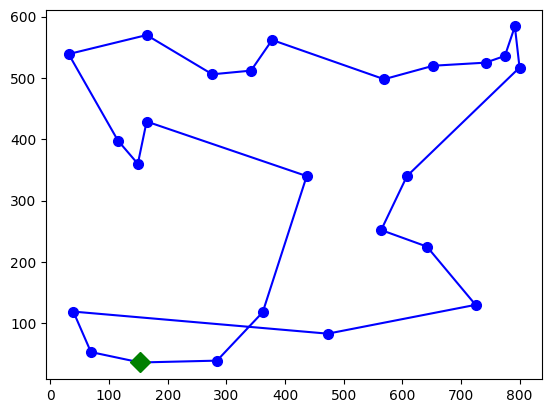

In [34]:
# https://deap.readthedocs.io/en/master/api/tools.html
start = time.time()

# numpy.random.permutation(x) : Randomly permute a sequence, or return a permuted range.
# Initialisieren einer Zufallsreihenfolge für die "Städte"
toolbox.register("indices", numpy.random.permutation, len(cities))

# Create Individuen & Population
toolbox.register("individual", tools.initIterate, creator.Individual,
                 toolbox.indices)
toolbox.register("population", tools.initRepeat, list, 
                 toolbox.individual)

# CROSSOVER 
toolbox.register("mate", tools.cxOrdered)
# toolbox.register("mate", tools.cxUniform, indpb = 0) 
# indpb = "individual probability gibt die Wahrscheinlichkeit an, 
# mit der für ein bestimmtes Individum ein crossover stattfindet
# toolbox.register("mate", tools.cxPartialyMatched)
# toolbox.register("mate", tools.cxUniformPartialyMatched, indpb = 0)

# MUTATION
# indpb – individual probability 
# indppb gibt hier die Wahrscheinlichkeit für eine Mutation an.
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.1)

# Berechnungsmethode für die Länge der Tour (also des Lösungskandidaten)
toolbox.register("evaluate", evaluation)

# Selektion
toolbox.register("select", tools.selTournament, tournsize=3)

# Größe der POPULATION: n kann variiert werden - was passiert ?
pop = toolbox.population(n=100)

# EVOLUTIONARY ALGORITHM : 
# cxpb steuert auch die Wahrscheinlichkeit für ein Crossover
# mutpb steuert auch die Wahrscheinlichkeit für eine Mutation
result, log = algorithms.eaSimple(pop, toolbox,
                             cxpb=0.5, mutpb=0.5,
                             ngen=1000, verbose=False)

# SELECTION : Try out different methods
best_individual = tools.selBest(result, k=1)[0]
# best_individual = tools.selTournament(result, k = 10, tournsize = 2)[0]

print('Fitness of the best individual: ', evaluation(best_individual)[0])
plot_tour(create_tour(best_individual))

ende = time.time()
print('Dauer der Berechnung: {:5.3f}s für eine Route zwischen {} Städten'.format(ende-start,num_cities))